In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
!git clone https://github.com/rhljain/Suntory-Dataset

Cloning into 'Suntory-Dataset'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 44.89 KiB | 510.00 KiB/s, done.


# EDA on Sales Data

In [ ]:
!git clone https://github.com/Priyanshu0/Sales_Alert_Demo.git

Cloning into 'Sales_Alert_Demo'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 45.54 KiB | 304.00 KiB/s, done.


In [ ]:
mmm_data = pd.read_csv("/content/Suntory-Dataset/MMM_data.csv")
cement_data = pd.read_csv("/content/Suntory-Dataset/Cement Data.csv")

In [ ]:
mmm_data.head(2)

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,1/1/10,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,1/2/10,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364


In [ ]:
mmm_data.dtypes

TV Manufacturing Brand                  object
DATE                                    object
DEMAND                                   int64
Consumer Price Index (CPI)             float64
Consumer Confidence Index(CCI)         float64
Producer Price Index (PPI)             float64
Unit Price ($)                         float64
POS/ Supply Data                         int64
SALES ($)                              float64
Advertising Expenses (SMS)             float64
Advertising Expenses(Newspaper ads)    float64
Advertising Expenses(Radio)            float64
Advertising Expenses(TV)               float64
Advertising Expenses(Internet)         float64
GRP (NewPaper ads)                     float64
GRP(SMS)                               float64
GRP(Radio)                             float64
GRP(Internet)                          float64
GRP(TV)                                float64
dtype: object

In [ ]:
mmm_data['DATE'] = pd.to_datetime(mmm_data['DATE'], format='%m/%d/%y')

In [ ]:
max(mmm_data["DATE"])

Timestamp('2017-02-25 00:00:00')

In [ ]:
mmm_data['Month'] = mmm_data['DATE'].dt.month
mmm_data['Year'] = mmm_data['DATE'].dt.year
mmm_data['Month_Name'] = mmm_data['DATE'].dt.strftime('%b')
mmm_data['Month_Year'] = pd.concat([mmm_data['Month_Name'], mmm_data['Year']], axis=1).astype(str).agg('_'.join, axis=1)

In [ ]:
mmm_data.dtypes

TV Manufacturing Brand                         object
DATE                                   datetime64[ns]
DEMAND                                          int64
Consumer Price Index (CPI)                    float64
Consumer Confidence Index(CCI)                float64
Producer Price Index (PPI)                    float64
Unit Price ($)                                float64
POS/ Supply Data                                int64
SALES ($)                                     float64
Advertising Expenses (SMS)                    float64
Advertising Expenses(Newspaper ads)           float64
Advertising Expenses(Radio)                   float64
Advertising Expenses(TV)                      float64
Advertising Expenses(Internet)                float64
GRP (NewPaper ads)                            float64
GRP(SMS)                                      float64
GRP(Radio)                                    float64
GRP(Internet)                                 float64
GRP(TV)                     

In [ ]:
mmm_data.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),...,Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV),Month,Year,Month_Name,Month_Year
0,TV Manufacturing & Supplier Unit,2010-01-01,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,...,722.571,95.333,11.8398,91.0000,276.3636,756.5909,1,2010,Jan,Jan_2010
1,TV Manufacturing & Supplier Unit,2010-01-02,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,...,717.857,114.957,27.8039,111.9091,291.3182,860.1364,1,2010,Jan,Jan_2010
2,TV Manufacturing & Supplier Unit,2010-01-03,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,...,653.333,113.090,0.0000,94.6364,282.7273,751.9545,1,2010,Jan,Jan_2010
3,TV Manufacturing & Supplier Unit,2010-01-04,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,...,622.095,72.442,0.0000,98.5909,306.3182,749.4545,1,2010,Jan,Jan_2010
4,TV Manufacturing & Supplier Unit,2010-01-05,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,...,722.571,95.333,11.8398,91.0000,276.3636,756.5909,1,2010,Jan,Jan_2010


In [ ]:
dictionary = {'SALES ($)': 'sum',
             'POS/ Supply Data' : 'sum',
             'Unit Price ($)' : 'sum',
             'DEMAND' : 'sum',
             'Advertising Expenses (SMS)': 'sum',
             'Advertising Expenses(Newspaper ads)': 'sum',
             'Advertising Expenses(Radio)': 'sum',
             'Advertising Expenses(TV)': 'sum',
             'Advertising Expenses(Internet)': 'sum',
             'GRP (NewPaper ads)': 'sum',
             'GRP(SMS)': 'sum',
             'GRP(Radio)': 'sum',
             'GRP(Internet)': 'sum',
             'GRP(TV)': 'sum'}

## Rolling Data to a Monthly Level from Daily Level

In [ ]:
result = mmm_data.groupby(['Month', 'Year']).agg(dictionary).reset_index()

In [ ]:
result.head()

,Month,Year,SALES ($),POS/ Supply Data,Unit Price ($),DEMAND,Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,1,2010,75906930.96,209908,11210.22,209071,2295.0501,413.597852,3176.8418,43547.7607,58076.855,3577.1130,907.7821,3421.2726,8729.4997,27212.9545
1,1,2011,77510632.98,214699,11191.62,314165,2026.5470,414.327755,2769.8847,43501.0308,99766.004,10665.9940,827.9618,3385.1819,7688.4546,35139.2271
2,1,2012,67501680.00,186675,11209.60,212122,1366.3583,345.880460,2436.8902,36010.0363,108135.430,23625.0753,1277.6262,6728.8892,10794.3223,46556.9091
3,1,2013,46689269.40,116694,12403.10,113923,2231.3958,416.520219,3084.9467,44006.8188,97298.242,5300.0890,926.2797,3207.7727,7981.5453,28616.7274
4,1,2014,25469165.70,63657,12403.10,73661,1832.3236,406.532651,2450.0326,42345.7433,113983.905,25086.6250,813.7074,3499.5000,7541.5907,36304.8177


In [ ]:
result = result.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index(drop=True)

In [ ]:
result.head()

,Month,Year,SALES ($),POS/ Supply Data,Unit Price ($),DEMAND,Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,1,2010,75906930.96,209908,11210.22,209071,2295.0501,413.597852,3176.8418,43547.7607,58076.855,3577.1130,907.7821,3421.2726,8729.4997,27212.9545
1,2,2010,99417293.64,274922,10125.36,306495,1868.2170,374.388925,2556.5763,39388.1855,87816.528,8043.9010,784.6643,3013.8637,6941.8637,32219.0453
2,3,2010,65713224.78,181719,11210.22,235442,1683.1114,386.195442,2431.8881,40275.1430,125260.192,33504.9720,992.7060,5345.7729,7720.4090,37214.6815
3,4,2010,70569781.38,195149,10848.60,176154,1573.4936,352.160729,2596.8738,36579.7162,73059.345,11840.9084,782.4507,4560.3297,10874.9949,36794.3181
4,5,2010,57464310.96,158908,11210.22,201588,2269.2365,413.869091,3127.4490,43706.3951,79261.813,4048.7810,970.1042,3305.4088,8167.5452,27693.9093


# EDA on Procurement Data

In [ ]:
cement_data['Month_Year'] = pd.concat([cement_data['Month Name'], cement_data['Year']], axis=1).astype(str).agg('_'.join, axis=1)


In [ ]:
result.head()

,Month,Year,SALES ($),POS/ Supply Data,Unit Price ($),DEMAND,Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,1,2010,75906930.96,209908,11210.22,209071,2295.0501,413.597852,3176.8418,43547.7607,58076.855,3577.1130,907.7821,3421.2726,8729.4997,27212.9545
1,2,2010,99417293.64,274922,10125.36,306495,1868.2170,374.388925,2556.5763,39388.1855,87816.528,8043.9010,784.6643,3013.8637,6941.8637,32219.0453
2,3,2010,65713224.78,181719,11210.22,235442,1683.1114,386.195442,2431.8881,40275.1430,125260.192,33504.9720,992.7060,5345.7729,7720.4090,37214.6815
3,4,2010,70569781.38,195149,10848.60,176154,1573.4936,352.160729,2596.8738,36579.7162,73059.345,11840.9084,782.4507,4560.3297,10874.9949,36794.3181
4,5,2010,57464310.96,158908,11210.22,201588,2269.2365,413.869091,3127.4490,43706.3951,79261.813,4048.7810,970.1042,3305.4088,8167.5452,27693.9093


In [ ]:
cement_data.columns.to_list()

['Month',
 'Month Name',
 'Year',
 'Production (Agro produce yield)',
 'Sales (Procurement)',
 'demand forecasted',
 'Loss rate % (in Agro procurement & Storage)',
 'Yield rate %',
 'Month_Year']

In [ ]:
cement_data.dtypes

Month                                           object
Month Name                                      object
Year                                             int64
Production (Agro produce yield)                  int64
Sales (Procurement)                              int64
demand forecasted                              float64
Loss rate % (in Agro procurement & Storage)    float64
Yield rate %                                   float64
Month_Year                                      object
dtype: object

In [ ]:
cement_data.head()

,Month,Month Name,Year,Production (Agro produce yield),Sales (Procurement),demand forecasted,Loss rate % (in Agro procurement & Storage),Yield rate %,Month_Year
0,10-Jan,Jan,2010,347,322,346.0,10.25,89.75,Jan_2010
1,10-Feb,Feb,2010,306,285,338.0,10.33,89.67,Feb_2010
2,10-Mar,Mar,2010,236,245,276.0,10.42,89.58,Mar_2010
3,10-Apr,Apr,2010,234,212,245.0,10.50,89.50,Apr_2010
4,10-May,May,2010,296,289,312.0,10.58,89.42,May_2010


In [ ]:
max(cement_data["Year"])

2022

In [ ]:
d = dict(zip(pd.date_range('2010-01-01', freq='M', periods=12).strftime('%b'), range(1,13)))

In [ ]:
d

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [ ]:
cement_data['Month Index'] = cement_data['Month Name'].map(d)

## Merging Sales Data with Procurement Data

In [ ]:
master_data = pd.merge(result, cement_data[['Production (Agro produce yield)','Sales (Procurement)',
                                'demand forecasted',
                                'Loss rate % (in Agro procurement & Storage)',
                                'Yield rate %',
                                'Month Index', 'Year']], left_on=['Month', 'Year'], right_on=['Month Index', 'Year'], how='left')

In [ ]:
master_data.head()

,Month,Year,SALES ($),POS/ Supply Data,Unit Price ($),DEMAND,Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),...,GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV),Production (Agro produce yield),Sales (Procurement),demand forecasted,Loss rate % (in Agro procurement & Storage),Yield rate %,Month Index
0,1,2010,75906930.96,209908,11210.22,209071,2295.0501,413.597852,3176.8418,43547.7607,...,907.7821,3421.2726,8729.4997,27212.9545,347,322,346.0,10.25,89.75,1
1,2,2010,99417293.64,274922,10125.36,306495,1868.2170,374.388925,2556.5763,39388.1855,...,784.6643,3013.8637,6941.8637,32219.0453,306,285,338.0,10.33,89.67,2
2,3,2010,65713224.78,181719,11210.22,235442,1683.1114,386.195442,2431.8881,40275.1430,...,992.7060,5345.7729,7720.4090,37214.6815,236,245,276.0,10.42,89.58,3
3,4,2010,70569781.38,195149,10848.60,176154,1573.4936,352.160729,2596.8738,36579.7162,...,782.4507,4560.3297,10874.9949,36794.3181,234,212,245.0,10.50,89.50,4
4,5,2010,57464310.96,158908,11210.22,201588,2269.2365,413.869091,3127.4490,43706.3951,...,970.1042,3305.4088,8167.5452,27693.9093,296,289,312.0,10.58,89.42,5


In [ ]:
master_data['Year'].max()

2017

In [ ]:
master_data.drop(columns="Month Index", inplace=True)

In [ ]:
master_data['Factor'] = np.random.uniform(2, 7, size=len(master_data))
master_data.columns

Index(['Month', 'Year', 'SALES ($)', 'POS/ Supply Data', 'Unit Price ($)',
       'DEMAND', 'Advertising Expenses (SMS)',
       'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)',
       'Advertising Expenses(TV)', 'Advertising Expenses(Internet)',
       'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio)', 'GRP(Internet)',
       'GRP(TV)', 'Production (Agro produce yield)', 'Sales (Procurement)',
       'demand forecasted', 'Loss rate % (in Agro procurement & Storage)',
       'Yield rate %', 'Factor'],
      dtype='object')

In [ ]:
master_data['Adjusted_Demand'] = master_data['DEMAND'] * master_data['Factor']

In [ ]:
master_data['Total_Adverstising_Cost'] = (master_data['Advertising Expenses (SMS)'] +
master_data['Advertising Expenses(Newspaper ads)'] + master_data['Advertising Expenses(Radio)'] +
master_data['Advertising Expenses(TV)']+ master_data['Advertising Expenses(Internet)'])

In [ ]:
master_data['Total_GRP'] = (master_data['GRP (NewPaper ads)'] +
master_data['GRP(SMS)'] + master_data['GRP(Radio)'] +
master_data['GRP(Internet)']+ master_data['GRP(TV)'])

In [ ]:
master_data.columns

Index(['Month', 'Year', 'SALES ($)', 'POS/ Supply Data', 'Unit Price ($)',
       'DEMAND', 'Advertising Expenses (SMS)',
       'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)',
       'Advertising Expenses(TV)', 'Advertising Expenses(Internet)',
       'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio)', 'GRP(Internet)',
       'GRP(TV)', 'Production (Agro produce yield)', 'Sales (Procurement)',
       'demand forecasted', 'Loss rate % (in Agro procurement & Storage)',
       'Yield rate %', 'Factor', 'Adjusted_Demand', 'Total_Adverstising_Cost',
       'Total_GRP'],
      dtype='object')

# Calculating KPIs

## Normalizing Data using Min-Max Scaling

In [ ]:
x = master_data[['POS/ Supply Data', 'SALES ($)', "Unit Price ($)", 'Adjusted_Demand', "DEMAND", 'Production (Agro produce yield)', 'Sales (Procurement)', 'Loss rate % (in Agro procurement & Storage)',
       'Yield rate %', 'Total_Adverstising_Cost', 'Total_GRP']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [ ]:
#x_scaled

In [ ]:
master_data_req = pd.DataFrame(x_scaled, columns=['POS/ Supply Data', 'SALES ($)', "Unit Price ($)", 'Adjusted_Demand', 'DEMAND', 'Production (Agro produce yield)', 'Sales (Procurement)', 'Loss rate % (in Agro procurement & Storage)',
       'Yield rate %', 'Total_Adverstising_Cost', 'Total_GRP'])

In [ ]:
master_data_req.head()

,POS/ Supply Data,SALES ($),Unit Price ($),Adjusted_Demand,DEMAND,Production (Agro produce yield),Sales (Procurement),Loss rate % (in Agro procurement & Storage),Yield rate %,Total_Adverstising_Cost,Total_GRP
0,0.628721,0.638526,0.735103,0.285722,0.551530,0.322464,0.310219,0.300699,0.699301,0.196029,0.072911
1,0.881248,0.884384,0.494193,0.908072,0.891612,0.248188,0.242701,0.319347,0.680653,0.494074,0.200154
2,0.519229,0.531925,0.735103,0.485481,0.643585,0.121377,0.169708,0.340326,0.659674,0.956863,0.800829
3,0.571394,0.582712,0.654799,0.214331,0.436626,0.117754,0.109489,0.358974,0.641026,0.276965,0.446463
4,0.430626,0.445663,0.735103,0.459920,0.525409,0.230072,0.250000,0.377622,0.622378,0.454830,0.078907


In [ ]:
master_data_req['Market_Share_capturing_effort'] = (master_data_req['POS/ Supply Data']/
                                                master_data_req['Adjusted_Demand'])

master_data_req['Branding_Effort'] = (master_data_req['Total_Adverstising_Cost']/
                                                (master_data_req['Adjusted_Demand'] * master_data_req['Unit Price ($)']))

master_data_req['ROAS'] = (master_data_req['SALES ($)']/ master_data_req['Total_Adverstising_Cost'])

In [ ]:
master_data_req.columns.to_list()

['POS/ Supply Data',
 'SALES ($)',
 'Unit Price ($)',
 'Adjusted_Demand',
 'DEMAND',
 'Production (Agro produce yield)',
 'Sales (Procurement)',
 'Loss rate % (in Agro procurement & Storage)',
 'Yield rate %',
 'Total_Adverstising_Cost',
 'Total_GRP',
 'Market_Share_capturing_effort',
 'Branding_Effort',
 'ROAS']

## Correlation Matrix

In [ ]:
cor_df = master_data_req.loc[:,['Market_Share_capturing_effort', 'Branding_Effort', 'ROAS', 'Adjusted_Demand', "DEMAND",
                           'Production (Agro produce yield)','Sales (Procurement)',
                            'Loss rate % (in Agro procurement & Storage)', 'Total_Adverstising_Cost',
                           'Total_GRP', 'SALES ($)']]

In [ ]:
cor_df.columns

Index(['Market_Share_capturing_effort', 'Branding_Effort', 'ROAS',
       'Adjusted_Demand', 'DEMAND', 'Production (Agro produce yield)',
       'Sales (Procurement)', 'Loss rate % (in Agro procurement & Storage)',
       'Total_Adverstising_Cost', 'Total_GRP', 'SALES ($)'],
      dtype='object')

In [ ]:
correlation_matrix = cor_df.corr().reset_index()
correlation_matrix.columns

Index(['index', 'Market_Share_capturing_effort', 'Branding_Effort', 'ROAS',
       'Adjusted_Demand', 'DEMAND', 'Production (Agro produce yield)',
       'Sales (Procurement)', 'Loss rate % (in Agro procurement & Storage)',
       'Total_Adverstising_Cost', 'Total_GRP', 'SALES ($)'],
      dtype='object')

In [ ]:
df = correlation_matrix.iloc[3:,:4].reset_index(drop = True)
df

,index,Market_Share_capturing_effort,Branding_Effort,ROAS
0,Adjusted_Demand,0.048872,-0.416621,0.114013
1,DEMAND,0.472745,-0.411877,0.243181
2,Production (Agro produce yield),0.182119,-0.008319,-0.114481
3,Sales (Procurement),0.151841,-0.008617,-0.120615
4,Loss rate % (in Agro procurement & Storage),0.102852,-0.211523,0.246408
5,Total_Adverstising_Cost,-0.167605,0.318851,-0.514323
6,Total_GRP,-0.040923,0.242516,-0.263104
7,SALES ($),0.570528,-0.445818,0.318525


<Axes: >

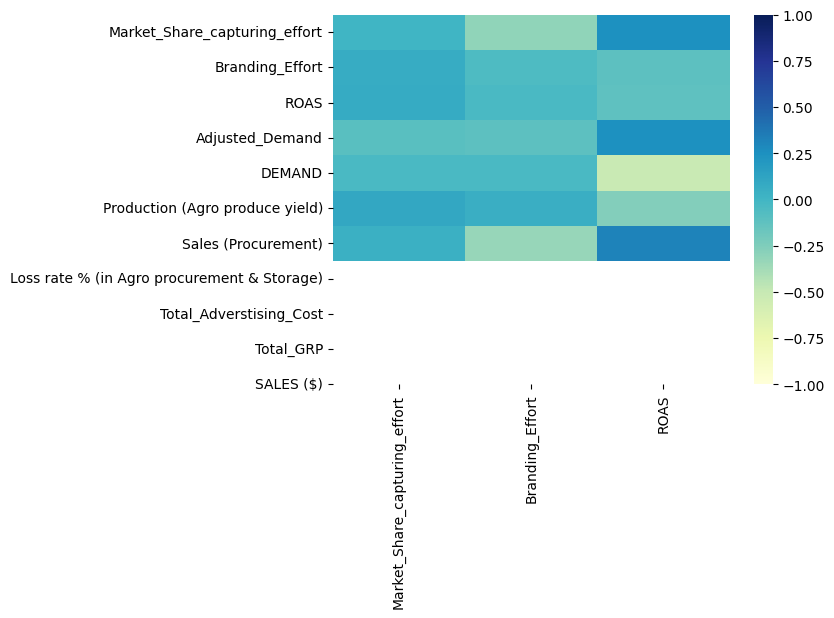

In [ ]:
sns.heatmap(correlation_matrix.iloc[4:,1:4], cmap="YlGnBu", annot=False, vmin=-1, vmax=1, yticklabels=correlation_matrix['index'])

# Sensitivity Analysis

## Covariance Analysis

In [ ]:
cov_matrix = cor_df.iloc[:, 3:].cov()

In [ ]:
cov_matrix

,Adjusted_Demand,DEMAND,Production (Agro produce yield),Sales (Procurement),Loss rate % (in Agro procurement & Storage),Total_Adverstising_Cost,Total_GRP,SALES ($)
Adjusted_Demand,0.075905,0.057172,-0.009940,-0.012070,0.031840,-0.004924,-0.006861,0.058058
DEMAND,0.057172,0.065976,-0.010266,-0.011976,0.020290,0.001222,-0.001713,0.065432
Production (Agro produce yield),-0.009940,-0.010266,0.064339,0.063071,-0.017699,-0.003435,-0.003861,-0.003661
Sales (Procurement),-0.012070,-0.011976,0.063071,0.063075,-0.017510,-0.003637,-0.004633,-0.005845
Loss rate % (in Agro procurement & Storage),0.031840,0.020290,-0.017699,-0.017510,0.069449,0.003499,0.002496,0.021548
Total_Adverstising_Cost,-0.004924,0.001222,-0.003435,-0.003637,0.003499,0.071236,0.053691,-0.003496
Total_GRP,-0.006861,-0.001713,-0.003861,-0.004633,0.002496,0.053691,0.093293,-0.003370
SALES ($),0.058058,0.065432,-0.003661,-0.005845,0.021548,-0.003496,-0.003370,0.070221


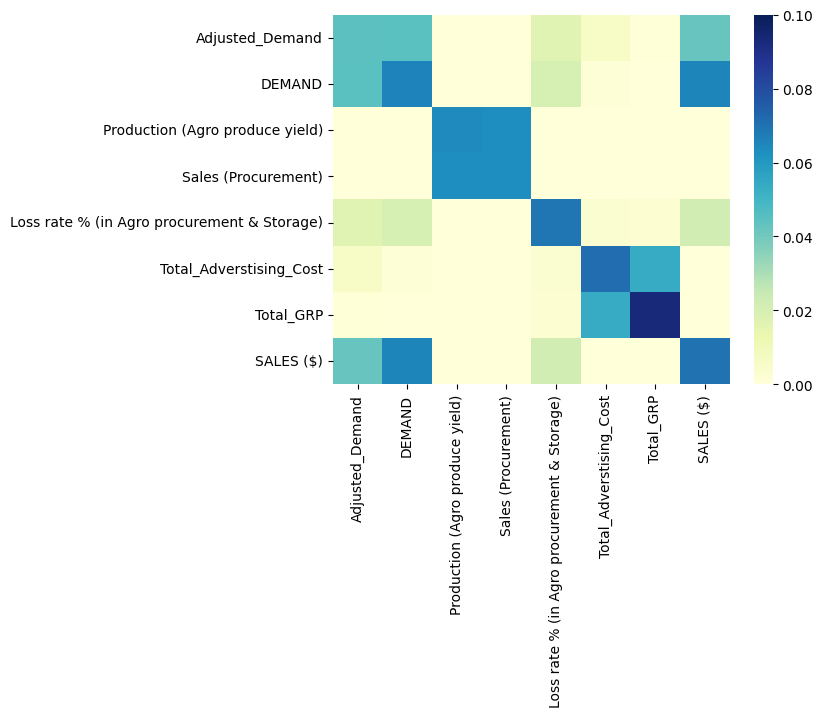

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(cov_matrix, cmap="YlGnBu", annot=False, vmin=0, vmax=0.1)

## Monte-Carlo Simulation




In [ ]:
type(correlation_matrix)

pandas.core.frame.DataFrame

In [ ]:
correlation_matrix.reset_index(drop=True)

,index,Market_Share_capturing_effort,Branding_Effort,ROAS,Adjusted_Demand,DEMAND,Production (Agro produce yield),Sales (Procurement),Loss rate % (in Agro procurement & Storage),Total_Adverstising_Cost,Total_GRP,SALES ($)
0,Market_Share_capturing_effort,1.000000,-0.170170,0.336039,0.048872,0.472745,0.182119,0.151841,0.102852,-0.167605,-0.040923,0.570528
1,Branding_Effort,-0.170170,1.000000,-0.193728,-0.416621,-0.411877,-0.008319,-0.008617,-0.211523,0.318851,0.242516,-0.445818
2,ROAS,0.336039,-0.193728,1.000000,0.114013,0.243181,-0.114481,-0.120615,0.246408,-0.514323,-0.263104,0.318525
3,Adjusted_Demand,0.048872,-0.416621,0.114013,1.000000,0.828002,-0.176440,-0.184704,0.295964,0.100447,0.014755,0.760604
4,DEMAND,0.472745,-0.411877,0.243181,0.828002,1.000000,-0.157562,-0.185655,0.299753,0.017832,-0.021836,0.961304
5,Production (Agro produce yield),0.182119,-0.008319,-0.114481,-0.176440,-0.157562,1.000000,0.990068,-0.264776,-0.050733,-0.049841,-0.054464
6,Sales (Procurement),0.151841,-0.008617,-0.120615,-0.184704,-0.185655,0.990068,1.000000,-0.264569,-0.054257,-0.060391,-0.087827
7,Loss rate % (in Agro procurement & Storage),0.102852,-0.211523,0.246408,0.295964,0.299753,-0.264776,-0.264569,1.000000,0.049742,0.031007,0.308563
8,Total_Adverstising_Cost,-0.167605,0.318851,-0.514323,0.100447,0.017832,-0.050733,-0.054257,0.049742,1.000000,0.658615,-0.049429
9,Total_GRP,-0.040923,0.242516,-0.263104,0.014755,-0.021836,-0.049841,-0.060391,0.031007,0.658615,1.000000,-0.041634


In [ ]:
correlation_matrix_values = correlation_matrix.iloc[3:, 4:].values

In [ ]:
#correlation_matrix_values

In [ ]:
num_samples = 1000
num_variables = correlation_matrix_values.shape[0]

In [ ]:
num_variables

8

In [ ]:
uncorrelated = np.random.randn(num_samples, num_variables)

### Using Cholesky Decomposition for generating correlated values

In [ ]:
cholesky = np.linalg.cholesky(correlation_matrix_values)
correlated = uncorrelated @ cholesky.T

In [ ]:
#correlated

In [ ]:
def calculate_market_capturing_effort(array, idx):
  num_variables = array.shape[1]
  coeffs = np.random.randn(num_variables)
  return coeffs[0] * array[idx, 0] + coeffs[1] * array[idx,1] - coeffs[2] * array[idx, 2] - coeffs[3] * array[idx, 3] + coeffs[4] * array[idx, 4] - coeffs[5]* array[idx, 5] - coeffs[6] * array[idx, 6] - coeffs[7] * array[idx, 7]

In [ ]:
market_capturing_effort = calculate_market_capturing_effort(correlated, 10)

In [ ]:
market_capturing_effort

3.812553548325383

In [ ]:
all_stats = []

# Loop through many simulations
for _ in range(num_samples):
  idx = np.random.randint(num_samples)
  market_capturing_effort = calculate_market_capturing_effort(correlated, idx)
  all_stats.append(market_capturing_effort)

In [ ]:
mean_market_capturing_effort = np.mean(all_stats)

In [ ]:
std_dev_market_capturing_effort = np.std(all_stats)

In [ ]:
print("Mean market capturing effort:", mean_market_capturing_effort)
print("Standard deviation of market capturing effort", std_dev_market_capturing_effort)

Mean market capturing effort: -0.08862630896847544
Standard deviation of market capturing effort 2.9245506964265915


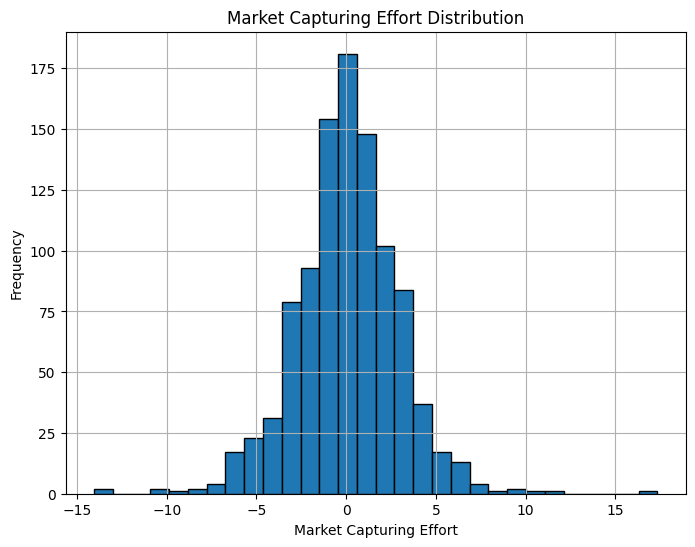

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(all_stats, bins=30, edgecolor='black')
plt.title('Market Capturing Effort Distribution')
plt.xlabel('Market Capturing Effort')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
percentiles = np.percentile(all_stats, [5, 50, 95])
print("5th percentile:", percentiles[0])
print("Median (50th percentile):", percentiles[1])
print("95th percentile:", percentiles[2])

5th percentile: -4.6599873925304305
Median (50th percentile): 0.13930219982433312
95th percentile: 4.316352803577646


## Linear Regression

In [ ]:
master_data.columns

Index(['Month', 'Year', 'SALES ($)', 'POS/ Supply Data', 'Unit Price ($)',
       'DEMAND', 'Advertising Expenses (SMS)',
       'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)',
       'Advertising Expenses(TV)', 'Advertising Expenses(Internet)',
       'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio)', 'GRP(Internet)',
       'GRP(TV)', 'Production (Agro produce yield)', 'Sales (Procurement)',
       'demand forecasted', 'Loss rate % (in Agro procurement & Storage)',
       'Yield rate %', 'Factor', 'Adjusted_Demand', 'Total_Adverstising_Cost',
       'Total_GRP'],
      dtype='object')

In [ ]:
master_data['Market_Share_Capturing_effort_Raw'] = (master_data['POS/ Supply Data']/
                                                master_data['Adjusted_Demand'])

master_data['Branding_Effort_Raw'] = (master_data['Total_Adverstising_Cost']/
                                                (master_data['Adjusted_Demand'] * master_data['Unit Price ($)']))

master_data['ROAS_Raw'] = (master_data['SALES ($)']/ master_data['Total_Adverstising_Cost'])

In [ ]:
import statsmodels.api as sm

KPI_List = ["Market_Share_Capturing_effort_Raw", "Branding_Effort_Raw", "ROAS_Raw"]

X_vars_list = ["Adjusted_Demand", "Production (Agro produce yield)", "Sales (Procurement)", "Loss rate % (in Agro procurement & Storage)",
               "Total_Adverstising_Cost", "Total_GRP", "SALES ($)"]

# Initialize LR_data
LR_data = pd.DataFrame(index=X_vars_list, columns=KPI_List)

In [ ]:
for x_var_name in X_vars_list:
    print(x_var_name)

    x_var = master_data[x_var_name]

    for kpi_name in KPI_List[0:]:
        print(kpi_name)

        y_var = master_data[kpi_name]

        # Create a DataFrame with the selected X and Y variables
        data_mod = pd.DataFrame({'Y': y_var, 'X': x_var})

        # Drop rows with missing values
        data_mod = data_mod.dropna()

        if not data_mod.empty:
            # Add a constant term to the independent variable
            X = sm.add_constant(data_mod['X'])

            # Fit linear regression model
            mod = sm.OLS(data_mod['Y'], X).fit()

            # Store the coefficient in LR_data
            LR_data.at[x_var_name, kpi_name] = mod.params['X']
        else:
            print(f"Missing values found. Model not fitted for combination ({x_var_name}, {kpi_name})")

Adjusted_Demand
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
Production (Agro produce yield)
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
Sales (Procurement)
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
Loss rate % (in Agro procurement & Storage)
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
Total_Adverstising_Cost
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
Total_GRP
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw
SALES ($)
Market_Share_Capturing_effort_Raw
Branding_Effort_Raw
ROAS_Raw


In [ ]:
LR_data

,Market_Share_Capturing_effort_Raw,Branding_Effort_Raw,ROAS_Raw
Adjusted_Demand,-0.0,-0.0,0.000374
Production (Agro produce yield),0.000117,0.0,-0.052063
Sales (Procurement),0.00013,0.0,-0.097973
Loss rate % (in Agro procurement & Storage),-0.023424,-0.000007,47.964813
Total_Adverstising_Cost,0.0,0.0,-0.003305
Total_GRP,0.000001,0.0,-0.002762
SALES ($),0.0,-0.0,0.000008


In [ ]:
# LR_data into % col-wise

# Alert, Diagnosis & Mitigation

## Knowledge Graph

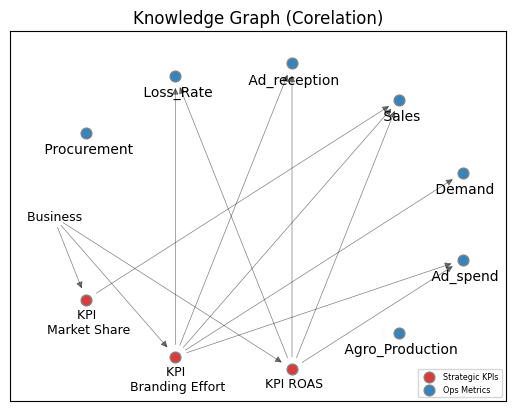

In [ ]:
# Build your graph
G2 = nx.DiGraph()
G2.clear()
Nodes_list = list(set(df['index']) - set(['DEMAND']))
KPI_list = ['Market_Share_capturing_effort',	'Branding_Effort',	'ROAS']
n_list =[]
root='Business'
G2.add_node(root)
e_list =[(root, KPI_list[0]),(root, KPI_list[1]),(root, KPI_list[2])]
for k in e_list:
  G2.add_edge(k[0], k[1] )

for i in KPI_list:
  G2.add_node(i)
  for j in Nodes_list:
    w=abs(df[df['index']==j][i]).values[0]
    if w >= 0.2:
      G2.add_edge(i,j, label='Strong', weight = w )
      n_list.append(j)
      e_list.append((i,j))
    else:
      G2.add_edge(i,j, label='Weak', weight = w )


# nodes
pos = nx.shell_layout(G2)  # positions for all nodes
options = {"edgecolors": "tab:gray", "node_size": 60, "alpha": 0.9}
nx.draw_networkx_nodes(G2, pos, nodelist=KPI_list, node_color="tab:red", **options)
nx.draw_networkx_nodes(G2, pos, nodelist=Nodes_list, node_color="tab:blue", **options)
#nx.draw(G2, with_labels=True )

# edges
nx.draw_networkx_edges(G2, pos, width=0, alpha=0.01)

'''nx.draw_networkx_edges(
    G2,
    pos,
    edgelist= e_list,
    width= 2,
    alpha=0.5,
    edge_color="tab:blue",
)'''

nx.draw_networkx_edges(
    G2,
    pos,
    edgelist= e_list,
    width= .5,
    alpha=0.5,
    edge_color="black",
)


labels1 = {
    'Market_Share_capturing_effort' : '\n\n\n KPI \n Market Share',
    'Branding_Effort' : '\n\n\n KPI \n Branding Effort',
    'ROAS': '\n\n KPI ROAS',
    'Business': ' Business'
}

labels2 = {
    'Loss rate % (in Agro procurement & Storage)': '\n\n Loss_Rate',
    'Production (Agro produce yield)':'\n\n Agro_Production',
    'Adjusted_Demand': '\n\n Demand',
    'Total_Adverstising_Cost': '\n\n Ad_spend',
    'Total_GRP': '\n\n Ad_reception',
    'SALES ($)': "\n\n Sales",
    'Sales (Procurement)':'\n\n Procurement'
}

G2.nodes()
nx.draw_networkx_labels(G2, pos, labels1, font_size=9, font_color="black")
nx.draw_networkx_labels(G2, pos, labels2, font_size=10, font_color="black")

#plt.figure(figsize=(20,20))
plt.title('Knowledge Graph (Corelation)')
plt.legend(['Strategic KPIs', 'Ops Metrics'], loc=4, fontsize ='xx-small' )

plt.show()

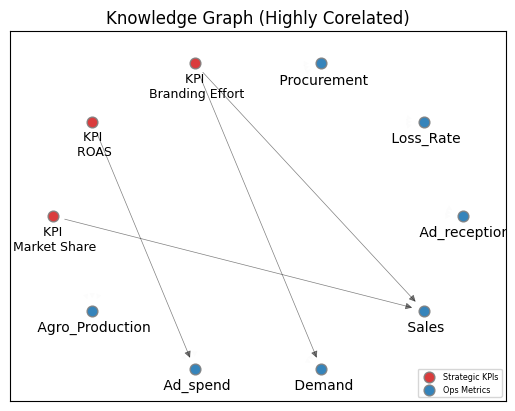

In [ ]:
# Build your graph
G2 = nx.DiGraph()
G2.clear()
n_list =[]
e_list =[]

for i in KPI_list:
  G2.add_node(i)
  for j in Nodes_list:
    w=abs(df[df['index']==j][i]).values[0]
    if w >= 0.4:
      G2.add_edge(i,j, label='Strong', weight = w )
      n_list.append(j)
      e_list.append((i,j))
    else:
      G2.add_edge(i,j, label='Weak', weight = w )

# nodes
pos = nx.shell_layout(G2)  # positions for all nodes
options = {"edgecolors": "tab:gray", "node_size": 60, "alpha": 0.9}
nx.draw_networkx_nodes(G2, pos, nodelist=KPI_list, node_color="tab:red", **options)
nx.draw_networkx_nodes(G2, pos, nodelist=Nodes_list, node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G2, pos, width=0, alpha=0.01)

nx.draw_networkx_edges(
    G2,
    pos,
    edgelist= e_list,
    width= .5,
    alpha=0.5,
    edge_color="black",
)

G2.nodes()
nx.draw_networkx_labels(G2, pos, labels1, font_size=9, font_color="black")
nx.draw_networkx_labels(G2, pos, labels2, font_size=10, font_color="black")

#plt.figure(figsize=(20,20))
plt.title('Knowledge Graph (Highly Corelated)')
plt.legend(['Strategic KPIs', 'Ops Metrics'], loc=4, fontsize ='xx-small' )

plt.show()

## Alert

In [ ]:
master_data['Market_Share_capturing_effort'] = (master_data['POS/ Supply Data']/
                                                master_data['Adjusted_Demand'])

master_data['Branding_Effort'] = (master_data['Total_Adverstising_Cost']/
                                                (master_data['Adjusted_Demand'] * master_data['Unit Price ($)']))

master_data['ROAS'] = (master_data['SALES ($)']/ master_data['Total_Adverstising_Cost'])

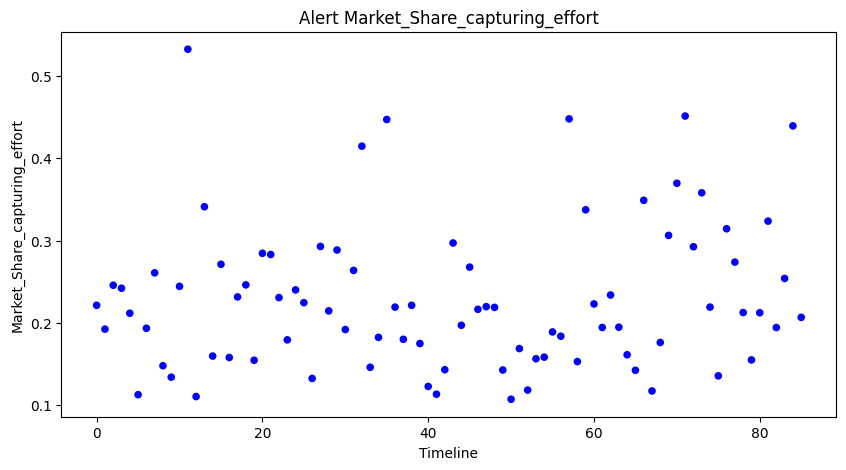

11
35
71
84
85


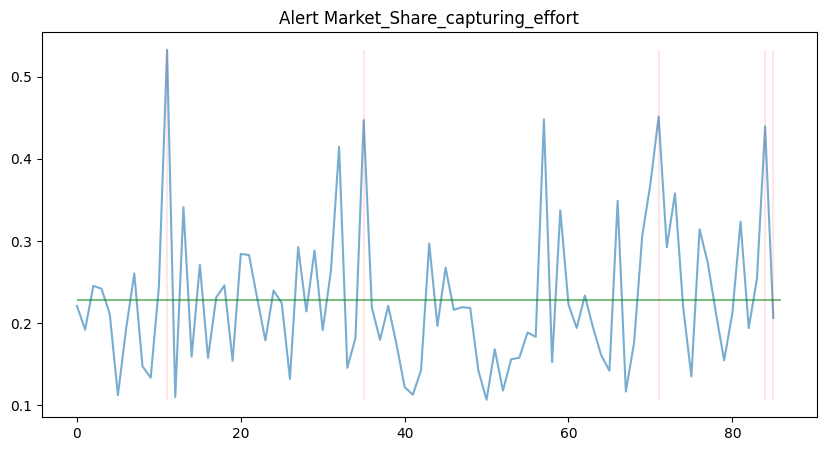

In [ ]:
# KPIs Plot + Threshold triggers
 #TYPE A  B  C  Alert

new_master_data = master_data.copy()
new_master_data['timeline'] = new_master_data['Year']*100+ new_master_data['Month']
new_master_data['index'] = new_master_data.index
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=float(.05))

i=0
data_check = new_master_data[[KPI_list[i], 'timeline' ]].values

model_IF.fit( data_check )
new_master_data['IF_anomaly_scores-{}'.format(KPI_list[i]) ] = model_IF.decision_function(data_check)
new_master_data['IF_anomaly-{}'.format(KPI_list[i])] = model_IF.predict(data_check)
avg = np.average(new_master_data[KPI_list[i]])
new_master_data['Alert-{}'.format(KPI_list[i])] = (new_master_data['IF_anomaly-{}'.format(KPI_list[i])]==-1) & (new_master_data[KPI_list[i]]< avg)
new_master_data['Alert-{}'.format(KPI_list[i])] = new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 1 if x else 0)
new_master_data.plot.scatter(x='index',
                               y=KPI_list[i],
                               c=new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 'red' if x<0 else 'blue'),
                               figsize=(10, 5),
                               title='Alert {}'.format(KPI_list[i]),
                               xlabel='Timeline',
                               ylabel='{}'.format(KPI_list[i]))

plt.show()

plt.figure(figsize=(10,5))

plt.plot(new_master_data[KPI_list[i]], alpha=0.6)
for k in new_master_data[new_master_data['Alert-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red')

for k in new_master_data[new_master_data['IF_anomaly-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red', alpha=0.1)

plt.hlines(avg, 0, len(new_master_data), color='green', alpha=0.5)
plt.title('Alert {}'.format(KPI_list[i]))
plt.show()

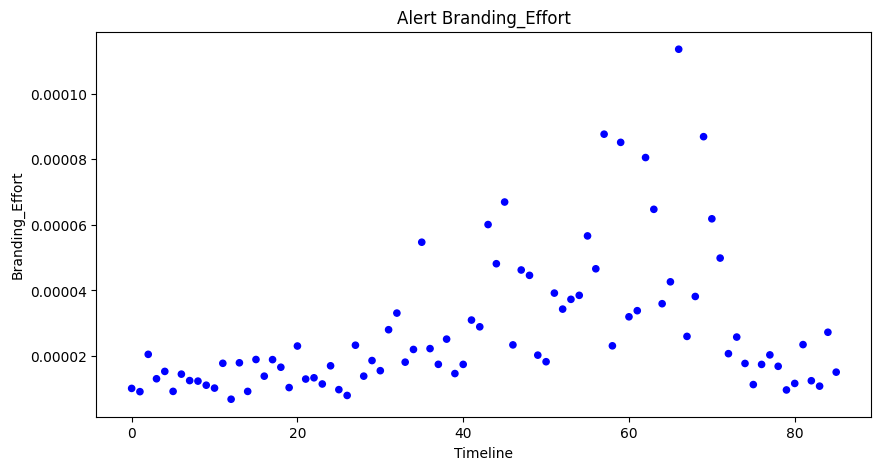

57
59
66
84
85


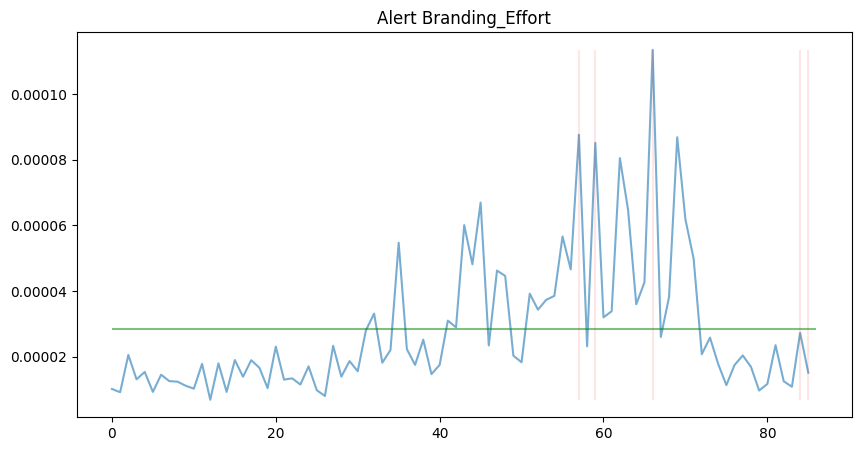

In [ ]:

new_master_data = master_data.copy()
new_master_data['timeline'] = new_master_data['Year']*100+ new_master_data['Month']
new_master_data['index'] = new_master_data.index
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=float(.05))

i=1
data_check = new_master_data[[KPI_list[i], 'timeline' ]].values

model_IF.fit( data_check )
new_master_data['IF_anomaly_scores-{}'.format(KPI_list[i]) ] = model_IF.decision_function(data_check)
new_master_data['IF_anomaly-{}'.format(KPI_list[i])] = model_IF.predict(data_check)
avg = np.average(new_master_data[KPI_list[i]])
new_master_data['Alert-{}'.format(KPI_list[i])] = (new_master_data['IF_anomaly-{}'.format(KPI_list[i])]==-1) & (new_master_data[KPI_list[i]]< avg)
new_master_data['Alert-{}'.format(KPI_list[i])] = new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 1 if x else 0)
new_master_data.plot.scatter(x='index',
                               y=KPI_list[i],
                               c=new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 'red' if x<0 else 'blue'),
                               figsize=(10, 5),
                               title='Alert {}'.format(KPI_list[i]),
                               xlabel='Timeline',
                               ylabel='{}'.format(KPI_list[i]))

plt.show()

plt.figure(figsize=(10,5))

plt.plot(new_master_data[KPI_list[i]], alpha=0.6)
for k in new_master_data[new_master_data['Alert-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red')

for k in new_master_data[new_master_data['IF_anomaly-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red', alpha=0.1)

plt.hlines(avg, 0, len(new_master_data), color='green', alpha=0.5)
plt.title('Alert {}'.format(KPI_list[i]))
plt.show()

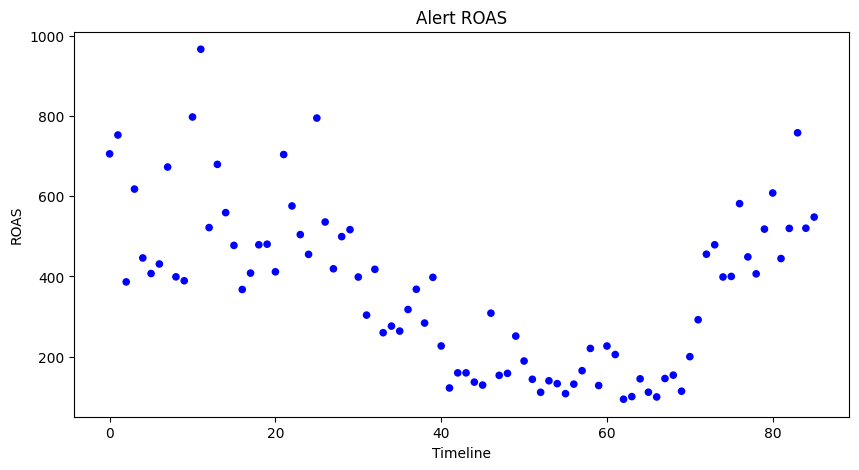

10
11
25
83
85


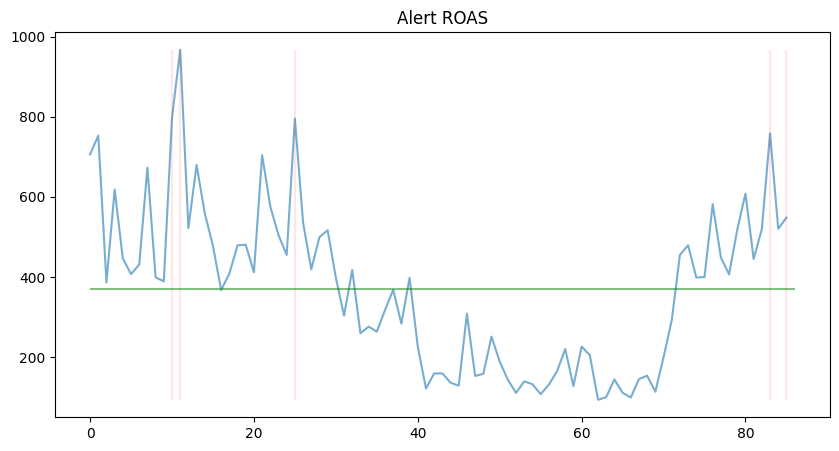

In [ ]:

new_master_data = master_data.copy()
new_master_data['timeline'] = new_master_data['Year']*100+ new_master_data['Month']
new_master_data['index'] = new_master_data.index
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=float(.05))

i=2
data_check = new_master_data[[KPI_list[i], 'timeline' ]].values

model_IF.fit( data_check )
new_master_data['IF_anomaly_scores-{}'.format(KPI_list[i]) ] = model_IF.decision_function(data_check)
new_master_data['IF_anomaly-{}'.format(KPI_list[i])] = model_IF.predict(data_check)
avg = np.average(new_master_data[KPI_list[i]])
new_master_data['Alert-{}'.format(KPI_list[i])] = (new_master_data['IF_anomaly-{}'.format(KPI_list[i])]==-1) & (new_master_data[KPI_list[i]]< avg)
new_master_data['Alert-{}'.format(KPI_list[i])] = new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 1 if x else 0)
new_master_data.plot.scatter(x='index',
                               y=KPI_list[i],
                               c=new_master_data['Alert-{}'.format(KPI_list[i])].apply(lambda x: 'red' if x<0 else 'blue'),
                               figsize=(10, 5),
                               title='Alert {}'.format(KPI_list[i]),
                               xlabel='Timeline',
                               ylabel='{}'.format(KPI_list[i]))

plt.show()

plt.figure(figsize=(10,5))

plt.plot(new_master_data[KPI_list[i]], alpha=0.6)
for k in new_master_data[new_master_data['Alert-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red')

for k in new_master_data[new_master_data['IF_anomaly-{}'.format(KPI_list[i])]<0]['index']:
  print (k)
  plt.vlines(k, min(new_master_data[KPI_list[i]]), max(new_master_data[KPI_list[i]]), color='red', alpha=0.1)

plt.hlines(avg, 0, len(new_master_data), color='green', alpha=0.5)
plt.title('Alert {}'.format(KPI_list[i]))
plt.show()

Text(0.5, 1.0, 'Demand')

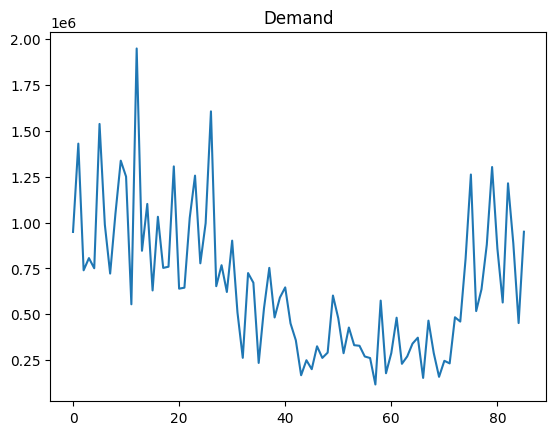

In [ ]:
plt.plot(new_master_data['Adjusted_Demand'])
plt.title('Demand')

Text(0.5, 1.0, 'Sales')

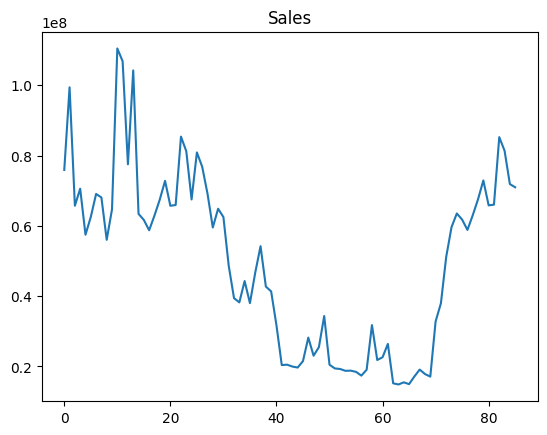

In [ ]:
plt.plot(new_master_data['SALES ($)'])
plt.title('Sales')

In [ ]:
# Discover Why - The Driving Factors basis Knowledge Graph & strong corelated factors


In [ ]:
# Prescribe on C
#Counter intuitive type: Sales are increasing then also an alert for it
# since, ROAS is good, but Ad/Demand is poor, thus, there is scope for improving market share even better.
#Prescribe: increase Ad spend.
